# User Overview analysis

The goal of this section is to understand the dataset, identify the missing values & outliers using visual and quantitative methods to get a sense of the story it tells.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
import sys


In [2]:
data = pd.read_excel('data/A month aggregated data on xDR.xlsx')
data['Number of sessions'] = 1

A look at the dataset to understand the data.
This step also identifies outliers.

In [3]:
data.describe(include='all')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Number of sessions
count,150001,150000,150000.000000,150000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,148848,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05,150001.0
unique,134709,111881,NaN,100962,NaN,NaN,NaN,NaN,NaN,45547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,,2019-04-29 07:08:38,NaN,2019-04-25 00:01:33,NaN,NaN,NaN,NaN,NaN,D41377B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,991,14,NaN,65,NaN,NaN,NaN,NaN,NaN,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2019-04-04 12:01:18,NaN,2019-04-24 22:59:58,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-04-29 07:28:43,NaN,2019-04-30 23:59:27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,499.188200,NaN,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,NaN,...,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,1.0
std,NaN,NaN,288.611834,NaN,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,NaN,...,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08,0.0
min,NaN,NaN,0.000000,NaN,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,NaN,...,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,1.0
25%,NaN,NaN,250.000000,NaN,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,NaN,...,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08,1.0


Finding out if there is data missing and what percent of the data is missing.

In [4]:
data.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [5]:
missing = data.isna().mean().round(4) * 100

In [6]:
missing = pd.DataFrame(missing)
missing = missing[missing[0]>0]

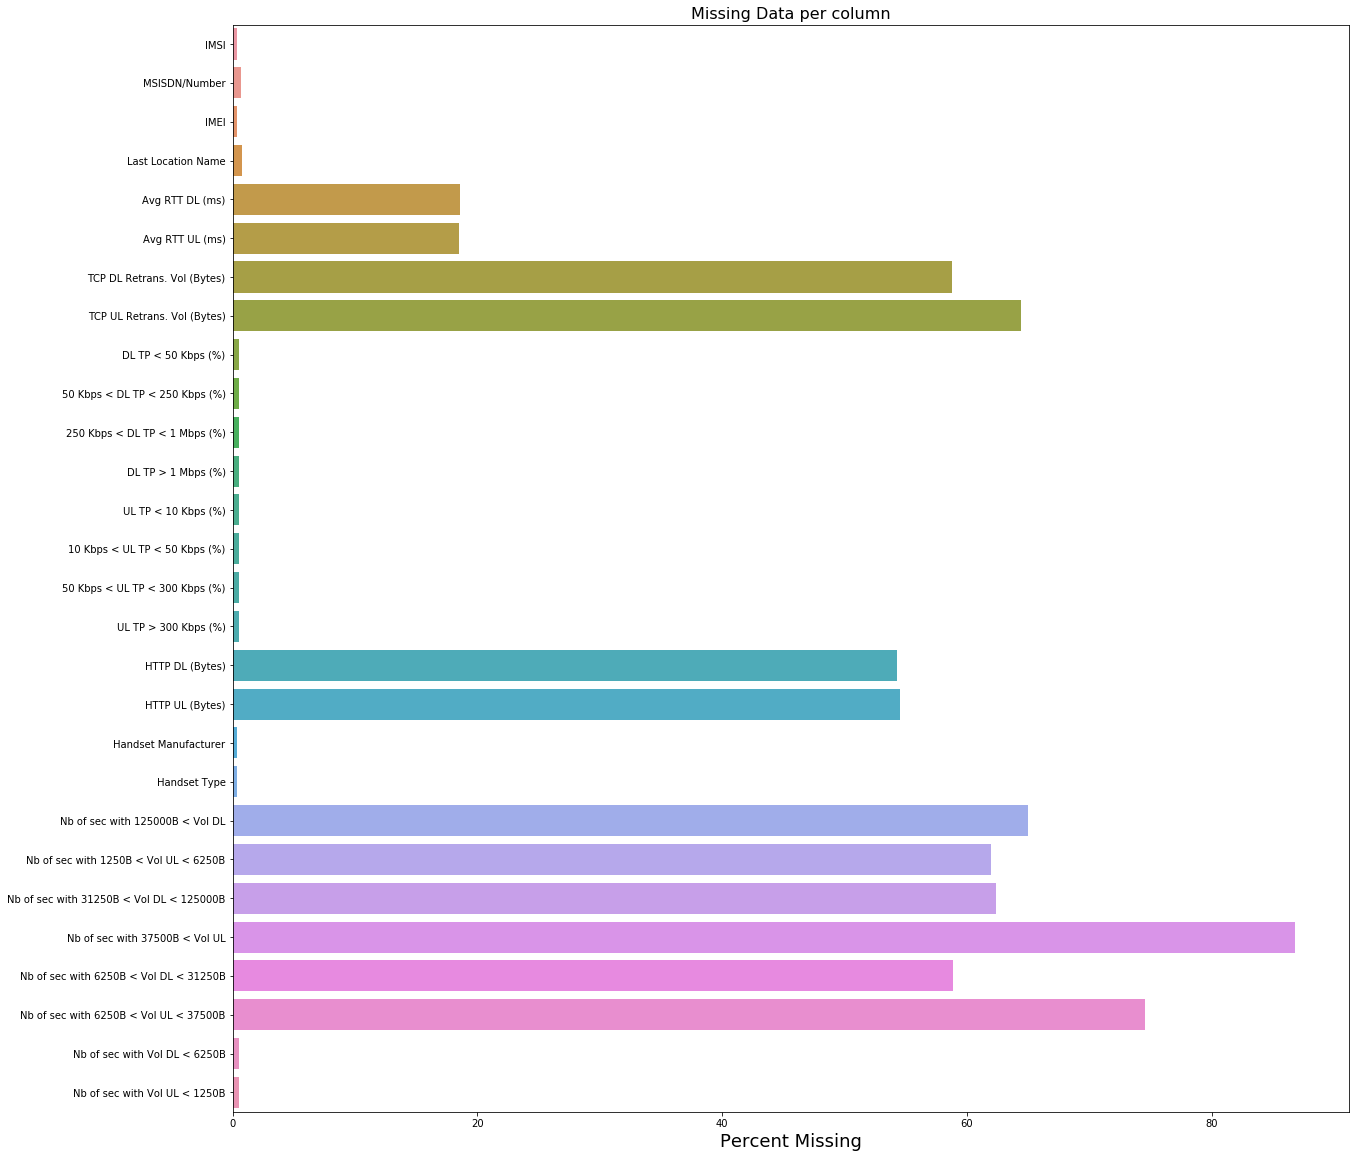

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
ax.set_title('Missing Data per column', fontsize=16)
ax = sns.barplot(y=missing.index, x=0, data=missing)
ax.set_xlabel('Percent Missing', fontsize=18)
plt.show()

### Top 10 handsets used by the customers

In [15]:
data['Handset Type'][data['MSISDN/Number']==33601001722]

41943    Huawei P20 Lite Huawei Nova 3E
Name: Handset Type, dtype: object

In [8]:
handsets_used = data['Handset Type'].value_counts()
top_handsets_used = pd.DataFrame(handsets_used.head(10))
top_handsets_used_list = list(top_handsets_used.index)
top_handsets_used_list

['Huawei B528S-23A',
 'Apple iPhone 6S (A1688)',
 'Apple iPhone 6 (A1586)',
 'undefined',
 'Apple iPhone 7 (A1778)',
 'Apple iPhone Se (A1723)',
 'Apple iPhone 8 (A1905)',
 'Apple iPhone Xr (A2105)',
 'Samsung Galaxy S8 (Sm-G950F)',
 'Apple iPhone X (A1901)']

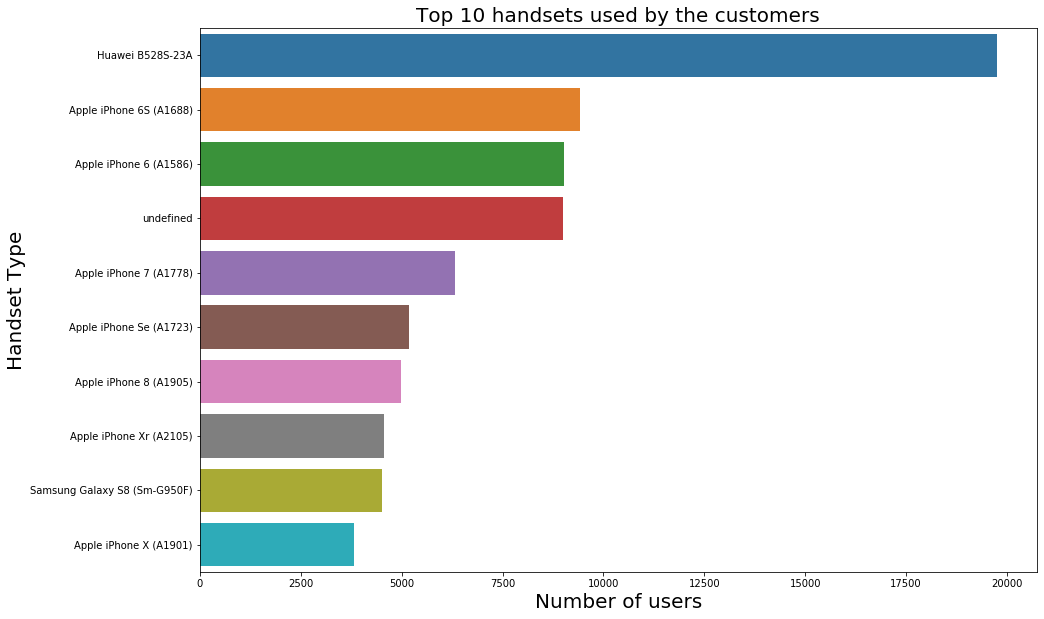

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top 10 handsets used by the customers', fontsize=20)
ax = sns.barplot(y=top_handsets_used.index, x='Handset Type', data=top_handsets_used)
ax.set_ylabel('Handset Type', fontsize=20)
ax.set_xlabel('Number of users', fontsize=20)
plt.show()

### Top 3 handset manufacturers

In [10]:
handset_manufacturers = data['Handset Manufacturer'].value_counts()
top_manufacturers_used = pd.DataFrame(handset_manufacturers.head(3))
top_manufacturers_used_list = list(top_manufacturers_used.index)

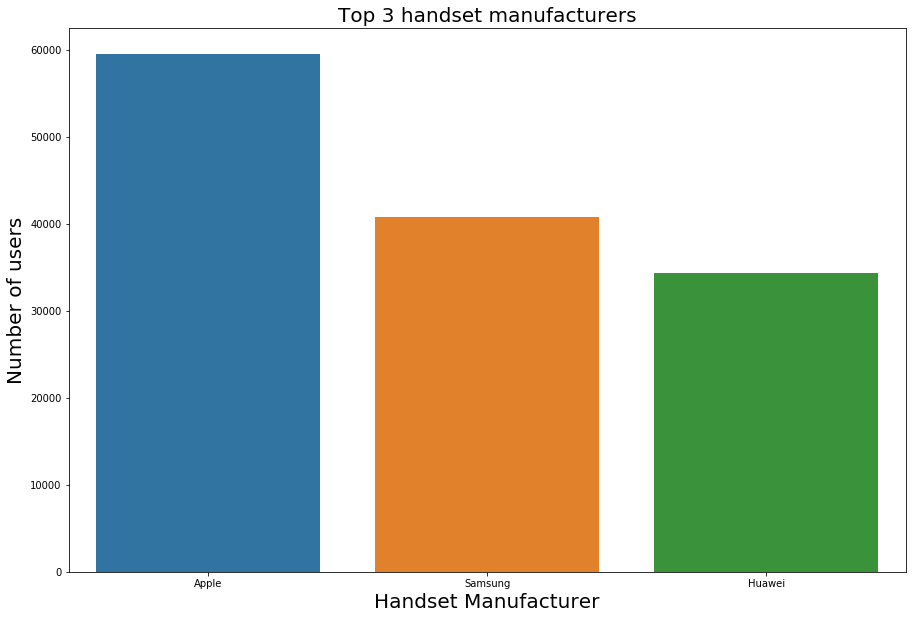

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title('Top 3 handset manufacturers', fontsize=20)
ax = sns.barplot(x=top_manufacturers_used.index, y='Handset Manufacturer', data=top_manufacturers_used)
ax.set_xlabel('Handset Manufacturer', fontsize=20)
ax.set_ylabel('Number of users', fontsize=20)
plt.show()

### Top 5 handsets per handset manufacturer

In [12]:
handset_manufacturers_list = list(data['Handset Manufacturer'].unique())

In [13]:
handsets_per_manufacture = []
for x in handset_manufacturers_list:
    try:
        row = []
        subset = data[data['Handset Manufacturer']== x]
        subset_type = subset['Handset Type'].value_counts()
        top = pd.DataFrame(subset_type.head(5))
        top = top.index
        row.extend([x,top[0],top[1],top[2],top[3],top[4]])
        handsets_per_manufacture.append(row)
    except IndexError:
        continue

In [14]:
handsets_per_manufacture= pd.DataFrame(handsets_per_manufacture, columns =['Handset Manufacturer','Handset Type 1','Handset Type 2','Handset Type 3','Handset Type 4','Handset Type 5'])
handsets_per_manufacture

,Handset Manufacturer,Handset Type 1,Handset Type 2,Handset Type 3,Handset Type 4,Handset Type 5
0,Samsung,Samsung Galaxy S8 (Sm-G950F),Samsung Galaxy A5 Sm-A520F,Samsung Galaxy J5 (Sm-J530),Samsung Galaxy J3 (Sm-J330),Samsung Galaxy S7 (Sm-G930X)
1,Huawei,Huawei B528S-23A,Huawei E5180,Huawei P20 Lite Huawei Nova 3E,Huawei P20,Huawei Y6 2018
2,Apple,Apple iPhone 6S (A1688),Apple iPhone 6 (A1586),Apple iPhone 7 (A1778),Apple iPhone Se (A1723),Apple iPhone 8 (A1905)
3,Zte,Zte Mf259,Zte Racer Iii Mini Zte Switch X1 Bouygues Tele...,Zte Blade V7 Lite Blade V6 Plus Zte Blitz,Zte Zte Blade C2 Smartphone Android By Sfr Sta...,Zte Blade V8 Lite Blade V8 Lite Zte Blade V8 Se
4,Wiko Global Sasu,Wiko Global Sasu Sunny3,Wiko Global Sasu Wiko Lenny3,Wiko Global Sasu Wiko Lenny2,Wiko Global Sasu Wiko Rainbow Lite 4G,Wiko Global Sasu Wiko Sunny
5,TCL Communication Ltd,Tcl Communicatio. Linkzone,Tcl Communicatio. Alcatel Onetouch Pop 3 (5),Tcl Communicatio. Pixi 4 6 3G Android,Tcl Communicatio. Pixi 4 6 4G Android,Tcl Communicatio. Nura 2
6,Oneplus Technology (Shenzhen) Co Ltd,Oneplus Technolo. Oneplus 6T,Oneplus Technolo. Oneplus 6,Oneplus Technolo. Oneplus 5,Oneplus Technolo. Oneplus5T,Oneplus Technolo. Oneplus 5T
7,Nokia,Nokia 520 Lumia 520 Nokia 520,Nokia Lumia 635 Rm-974,Nokia Rm-1038 Nokia Lumia 735,Nokia Rm-984 Lumia 830 Nokia 830,Nokia Rm-1017 530 Lumia 530
8,Tcl Communication Ltd,Tcl Communicatio. U3 3G,Tcl Communicatio. Alcatel Pixi 4 (4) 4034D,Tcl Communicatio. Alcatel U5,Tcl Communicatio. Alcatel 1X,Tcl Communicatio. Alcatel 1
9,Lenovo,Lenovo Moto E Plus (4Th Gen) Go12071045,Lenovo Lc12988845,Lenovo Bl12416045,Lenovo Moto G (5Th Gen) Indr003546,Lenovo Al12415545


### A short interpretation and recommendation to marketing teams

The marketing team could partner with Apple, Samsung and Huawei because they have the most users. The partnership will be for advertisements. The marketing should use the top hand types for promoting the companies product and brand.

#### From Huawei, Huawei B528S-23A would be ideal.
#### From Apple, Apple iPhone 6S (A1688) would be ideal.
#### From Samsung Galaxy S8 (Sm-G950F) would be ideal

## Prepare data for processing

In [15]:
dataset = data

In [16]:
#fill in missing values with mean 
dataset = dataset.fillna(dataset.mean())

#fill in missing values with mode 
mode = dataset.filter(['Last Location Name','Handset Manufacturer','Handset Type']).mode()
dataset[['Last Location Name','Handset Manufacturer','Handset Type']] = dataset[['Last Location Name','Handset Manufacturer','Handset Type']].fillna(value = mode.iloc[0])


In [17]:
#check if data is still missing
dataset.isnull().sum()

Bearer Id                                   0
Start                                       1
Start ms                                    0
End                                         1
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [18]:
#look for outliers
dataset.describe(include='all')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Number of sessions
count,150001,150000,150001.000000,150000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.0
unique,134709,111881,NaN,100962,NaN,NaN,NaN,NaN,NaN,45547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,,2019-04-29 07:08:38,NaN,2019-04-25 00:01:33,NaN,NaN,NaN,NaN,NaN,D41377B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,991,14,NaN,65,NaN,NaN,NaN,NaN,NaN,1233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2019-04-04 12:01:18,NaN,2019-04-24 22:59:58,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-04-29 07:28:43,NaN,2019-04-30 23:59:27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,499.188200,NaN,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,NaN,...,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,1.0
std,NaN,NaN,288.610872,NaN,288.096693,8.103735e+04,2.144722e+10,2.438731e+12,2.237359e+13,NaN,...,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08,0.0
min,NaN,NaN,0.000000,NaN,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,NaN,...,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,1.0
25%,NaN,NaN,250.000000,NaN,251.000000,5.744200e+04,2.082014e+14,3.365151e+10,3.546261e+13,NaN,...,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08,1.0


## Full User Overview analysis

In [19]:
#group data according to users
user_dataset = dataset.groupby('MSISDN/Number',as_index=False).agg('sum')

### Overview of the users’ behavior on applications.

In [20]:
user_dataset_apps = user_dataset[['MSISDN/Number','Number of sessions','Dur. (ms).1','Social Media DL (Bytes)', 
                             'Social Media UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)', 
                             'Email DL (Bytes)','Email UL (Bytes)', 'Youtube DL (Bytes)','Youtube UL (Bytes)',
                             'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)','Gaming UL (Bytes)', 
                             'Other DL (Bytes)', 'Other UL (Bytes)','Total UL (Bytes)', 'Total DL (Bytes)']]


In [21]:
user_dataset_apps['Dur. (min).1'] = user_dataset_apps['Dur. (ms).1'] /(6e+7)
user_dataset_apps['Social Media Total (Gigabytes)'] = (user_dataset_apps['Social Media DL (Bytes)'] + user_dataset_apps['Social Media UL (Bytes)'])/1e+9
user_dataset_apps['Google Total (Gigabytes)'] = (user_dataset_apps['Google DL (Bytes)'] + user_dataset_apps['Google UL (Bytes)'])/1e+9
user_dataset_apps['Email Total (Gigabytes)'] = (user_dataset_apps['Email DL (Bytes)'] + user_dataset_apps['Email UL (Bytes)'])/1e+9
user_dataset_apps['Youtube Total (Gigabytes)'] = (user_dataset_apps['Youtube DL (Bytes)'] + user_dataset_apps['Youtube UL (Bytes)'])/1e+9
user_dataset_apps['Netflix Total (Gigabytes)'] = (user_dataset_apps['Netflix DL (Bytes)'] + user_dataset_apps['Netflix UL (Bytes)'])/1e+9
user_dataset_apps['Gaming Total (Gigabytes)'] = (user_dataset_apps['Gaming DL (Bytes)'] + user_dataset_apps['Gaming UL (Bytes)'])/1e+9
user_dataset_apps['Other Total (Gigabytes)'] = (user_dataset_apps['Other DL (Bytes)'] + user_dataset_apps['Other UL (Bytes)'])/1e+9
user_dataset_apps['Total Total (Gigabytes)'] = (user_dataset_apps['Total UL (Bytes)'] + user_dataset_apps['Total DL (Bytes)'])/1e+9

C:\Users\smwik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\smwik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\smwik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [22]:
#Deal with outliers by replacing Outliers with Median Values
all_columns = list(user_dataset_apps.columns)
for x in all_columns:
    try:
        user_dataset_apps[x] = np.where(user_dataset_apps[x] > user_dataset_apps[x].quantile(0.95), user_dataset_apps[x].quantile(0.50), user_dataset_apps[x])
    except TypeError:
        continue

C:\Users\smwik\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### Exploratory data analysis 

##### A Non-Graphical Univariate Analysis

In [23]:
user_dataset_apps_description = user_dataset_apps.describe(include='all')
user_dataset_apps_shape = user_dataset_apps.shape
user_dataset_apps_head = user_dataset_apps.head(10)
user_dataset_apps_tail = user_dataset_apps.tail(10)
user_dataset_apps_sample = user_dataset_apps.sample(10)

In [44]:
user_dataset_apps_description

,MSISDN/Number,Number of sessions,Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),...,Total DL (Bytes),Dur. (min).1,Social Media Total (Gigabytes),Google Total (Gigabytes),Email Total (Gigabytes),Youtube Total (Gigabytes),Netflix Total (Gigabytes),Gaming Total (Gigabytes),Other Total (Gigabytes),Total Total (Gigabytes)
count,1.068570e+05,106857.000000,1.068570e+05,1.068570e+05,106857.000000,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,1.068570e+05,...,1.068570e+05,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000,106857.000000
mean,3.366839e+10,1.283519,1.196617e+08,2.216502e+06,40631.929672,7.093606e+06,2.535556e+06,2.208512e+06,5.760203e+05,1.433715e+07,...,5.621641e+08,1.994362,0.002258,0.009680,0.002798,0.028064,0.028044,0.531344,0.529924,0.614243
std,3.833950e+07,0.534699,7.694797e+07,1.316187e+06,24204.661045,4.199279e+06,1.507521e+06,1.308774e+06,3.428206e+05,8.530597e+06,...,3.185842e+08,1.282466,0.001326,0.005004,0.001480,0.013860,0.013913,0.311056,0.311565,0.331740
min,3.360100e+10,1.000000,7.142988e+06,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,9.700000e+01,1.400000e+01,5.300000e+01,...,8.827082e+06,0.119050,0.000002,0.000040,0.000018,0.000079,0.000185,0.000306,0.000149,0.033249
25%,3.365088e+10,1.000000,7.130922e+07,1.175914e+06,21601.000000,3.802905e+06,1.341108e+06,1.184547e+06,3.065680e+05,7.647171e+06,...,3.148302e+08,1.188487,0.001211,0.005943,0.001674,0.018631,0.018556,0.288067,0.285565,0.358553
50%,3.366365e+10,1.000000,1.027413e+08,2.265021e+06,41560.000000,7.256793e+06,2.593341e+06,2.266287e+06,5.873010e+05,1.460566e+07,...,5.703713e+08,1.712355,0.002304,0.009586,0.002800,0.026800,0.026720,0.542350,0.539840,0.617923
75%,3.367290e+10,1.000000,1.636505e+08,3.074193e+06,56341.000000,9.818515e+06,3.520006e+06,3.054581e+06,8.004330e+05,1.989671e+07,...,7.609512e+08,2.727508,0.003115,0.012320,0.003623,0.035081,0.035067,0.731078,0.728901,0.810060
max,3.376845e+10,3.000000,3.697632e+08,6.000522e+06,110658.000000,1.927878e+07,6.885738e+06,6.003031e+06,1.567091e+06,3.898187e+07,...,1.495636e+09,6.162720,0.006080,0.024757,0.007215,0.070931,0.070979,1.431628,1.434587,1.600386


In [45]:
user_dataset_apps_shape

(106857, 28)

In [46]:
user_dataset_apps_head

,MSISDN/Number,Number of sessions,Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),...,Total DL (Bytes),Dur. (min).1,Social Media Total (Gigabytes),Google Total (Gigabytes),Email Total (Gigabytes),Youtube Total (Gigabytes),Netflix Total (Gigabytes),Gaming Total (Gigabytes),Other Total (Gigabytes),Total Total (Gigabytes)
0,3.360100e+10,1.0,116720140.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,...,8.426375e+08,1.945336,0.002232,0.004389,0.001331,0.021625,0.027181,0.812459,0.386571,0.878691
1,3.360100e+10,1.0,181230963.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,...,1.207552e+08,3.020516,0.002661,0.005335,0.003308,0.012432,0.011222,0.119750,0.281710,0.156860
2,3.360100e+10,1.0,134969374.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,...,5.566597e+08,2.249490,0.003196,0.003443,0.003205,0.021334,0.019354,0.538828,0.501694,0.595966
3,3.360101e+10,1.0,49878024.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,...,4.019932e+08,0.831300,0.000280,0.009678,0.002285,0.006977,0.001942,0.391126,0.035280,0.422321
4,3.360101e+10,2.0,37104453.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,...,1.363130e+09,0.618408,0.002913,0.018500,0.003305,0.041533,0.049202,1.314798,0.804804,1.457411
5,3.360101e+10,2.0,253983077.0,3787122.0,5790.0,11993496.0,3269638.0,2266287.0,1334762.0,12169742.0,...,5.552080e+08,4.233051,0.003793,0.015263,0.002800,0.034347,0.030316,0.511636,0.492373,0.615217
6,3.360101e+10,2.0,128360523.0,2707339.0,62288.0,4346088.0,5850315.0,736446.0,622513.0,2990819.0,...,5.530412e+08,2.139342,0.002770,0.010196,0.001359,0.026431,0.045812,0.548461,0.224889,0.654723
7,3.360101e+10,1.0,86399977.0,1740000.0,42692.0,11036391.0,987223.0,1280558.0,935005.0,5100103.0,...,2.940851e+08,1.440000,0.001783,0.012024,0.002216,0.018893,0.015293,0.282364,0.178202,0.332660
8,3.360101e+10,2.0,102741321.0,5206619.0,82066.0,11046222.0,3087989.0,3666031.0,933794.0,14605665.0,...,8.965602e+08,1.712355,0.005289,0.014134,0.004600,0.063444,0.054216,0.833088,1.041883,0.990132
9,3.360102e+10,1.0,124854778.0,938582.0,18193.0,11098762.0,1836407.0,1986925.0,796355.0,13624376.0,...,6.853728e+08,2.080913,0.000957,0.012935,0.002783,0.028570,0.035525,0.647096,0.138339,0.732464


In [47]:
user_dataset_apps_tail

,MSISDN/Number,Number of sessions,Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),...,Total DL (Bytes),Dur. (min).1,Social Media Total (Gigabytes),Google Total (Gigabytes),Email Total (Gigabytes),Youtube Total (Gigabytes),Netflix Total (Gigabytes),Gaming Total (Gigabytes),Other Total (Gigabytes),Total Total (Gigabytes)
106847,3.366365e+10,1.0,98826284.0,1267120.0,4071.0,7039017.0,1356208.0,692635.0,195638.0,18914791.0,...,5.958639e+08,1.647105,0.001271,0.008395,0.000888,0.035720,0.011101,0.572547,0.229262,0.645778
106848,3.366365e+10,1.0,157069852.0,2468157.0,18789.0,5156022.0,834564.0,3201932.0,782694.0,7809215.0,...,6.741405e+08,2.617831,0.002487,0.005991,0.003985,0.028948,0.024294,0.638610,0.712062,0.710288
106849,3.366365e+10,1.0,160461578.0,1390786.0,22584.0,7178720.0,2714162.0,3301996.0,94611.0,19741224.0,...,1.740564e+08,2.674360,0.001413,0.009893,0.003397,0.028226,0.030370,0.134816,0.408107,0.208123
106850,3.366365e+10,2.0,210390146.0,4200896.0,49416.0,5035730.0,5210743.0,4750550.0,564777.0,20353018.0,...,1.023862e+09,3.506502,0.004250,0.010246,0.005315,0.038013,0.051950,0.972345,1.075140,1.094693
106851,3.366365e+10,1.0,8810688.0,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,...,6.879252e+08,0.146845,0.000300,0.007531,0.001007,0.026648,0.014903,0.660361,0.295283,0.714642
106852,3.366365e+10,1.0,140988659.0,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,...,4.445751e+08,2.349811,0.000499,0.005430,0.002514,0.019852,0.008531,0.437003,0.211115,0.480307
106853,3.366365e+10,1.0,102741321.0,2265021.0,41560.0,7256793.0,2593341.0,2266287.0,587301.0,14605665.0,...,5.703713e+08,1.712355,0.002304,0.009586,0.002800,0.026800,0.026720,0.542350,0.539840,0.617923
106854,3.366365e+10,1.0,102741321.0,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,...,1.948281e+08,1.712355,0.000715,0.010439,0.001521,0.011960,0.026592,0.178049,0.470526,0.232124
106855,3.366365e+10,1.0,253030201.0,496337.0,25229.0,8215537.0,1615080.0,2989663.0,328919.0,16690728.0,...,5.396350e+08,4.217170,0.000522,0.009831,0.003319,0.036735,0.030905,0.510143,0.149188,0.596288
106856,3.366365e+10,1.0,102741321.0,1500145.0,45943.0,5985089.0,3233558.0,2518425.0,812549.0,18980320.0,...,7.869760e+07,1.712355,0.001546,0.009219,0.003331,0.040941,0.028846,0.043070,0.401360,0.139154


In [48]:
user_dataset_apps_sample

,MSISDN/Number,Number of sessions,Dur. (ms).1,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),...,Total DL (Bytes),Dur. (min).1,Social Media Total (Gigabytes),Google Total (Gigabytes),Email Total (Gigabytes),Youtube Total (Gigabytes),Netflix Total (Gigabytes),Gaming Total (Gigabytes),Other Total (Gigabytes),Total Total (Gigabytes)
12012,3.362389e+10,2.0,65832338.0,4968517.0,82355.0,12142115.0,5412211.0,1936269.0,656528.0,34545703.0,...,516428170.0,1.097206,0.005051,0.017554,0.002593,0.058466,0.046058,0.464746,1.188969,0.599974
60289,3.366552e+10,1.0,104163927.0,3242519.0,3178.0,5017228.0,661037.0,1977347.0,496390.0,17941480.0,...,835177893.0,1.736065,0.003246,0.005678,0.002474,0.028161,0.024121,0.800780,0.217198,0.871295
73633,3.367066e+10,2.0,147333047.0,479699.0,32615.0,18585965.0,4266324.0,3649422.0,1093900.0,29375305.0,...,589702545.0,2.455551,0.000512,0.022852,0.004743,0.041096,0.036581,0.531906,0.774222,0.651128
83041,3.368933e+10,1.0,16035807.0,1748741.0,4378.0,1318139.0,536276.0,825589.0,477901.0,21027065.0,...,657230910.0,0.267263,0.001753,0.001854,0.001303,0.022005,0.014002,0.637379,0.542911,0.683864
4280,3.361153e+10,1.0,144465590.0,3071833.0,24434.0,873838.0,3515868.0,1759564.0,211013.0,6756478.0,...,90141164.0,2.407760,0.003096,0.004390,0.001971,0.020402,0.028951,0.058524,0.453131,0.118234
40665,3.366058e+10,2.0,277151932.0,3332487.0,59052.0,7183864.0,3282326.0,5635065.0,378918.0,33567852.0,...,782025162.0,4.619199,0.003392,0.010466,0.006014,0.060073,0.053768,0.699121,0.539840,0.845847
73683,3.367075e+10,1.0,74463732.0,1405164.0,41489.0,1803763.0,3343156.0,2638897.0,501924.0,12186357.0,...,44068263.0,1.241062,0.001447,0.005147,0.003141,0.017299,0.028403,0.023762,0.486581,0.082199
32220,3.365869e+10,1.0,305126217.0,2782810.0,51713.0,4705933.0,2407777.0,3158004.0,923629.0,22333291.0,...,631482965.0,5.085437,0.002835,0.007114,0.004082,0.030295,0.008058,0.607421,0.061881,0.663209
64079,3.366682e+10,1.0,86399983.0,1605458.0,65725.0,6008501.0,268025.0,2136000.0,62395.0,11010350.0,...,251275366.0,1.440000,0.001671,0.006277,0.002198,0.028296,0.032919,0.219574,0.588943,0.300439
48871,3.366251e+10,1.0,147943277.0,2656980.0,59375.0,8865613.0,3947082.0,2327196.0,868416.0,21042545.0,...,610582328.0,2.465721,0.002716,0.012813,0.003196,0.037909,0.019293,0.572542,0.530827,0.662249


##### A Graphical Univariate Analysis 

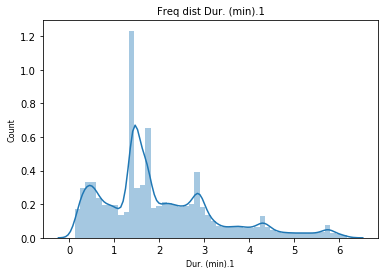

In [24]:
fig, ax = plt.subplots()
sns.distplot(user_dataset_apps['Dur. (min).1'], hist=True,)
ax.set_title('Freq dist '+'Dur. (min).1', fontsize=10)
ax.set_xlabel('Dur. (min).1', fontsize=8)
ax.set_ylabel('Count', fontsize=8)
plt.show()

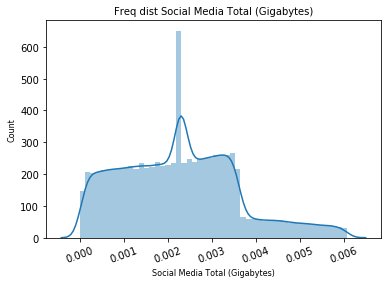

In [25]:
fig, ax = plt.subplots()
sns.distplot(user_dataset_apps['Social Media Total (Gigabytes)'], hist=True,)
ax.set_title('Freq dist '+'Social Media Total (Gigabytes)', fontsize=10)
ax.set_xlabel('Social Media Total (Gigabytes)', fontsize=8)
ax.set_ylabel('Count', fontsize=8)
plt.xticks(rotation=20)
plt.show()

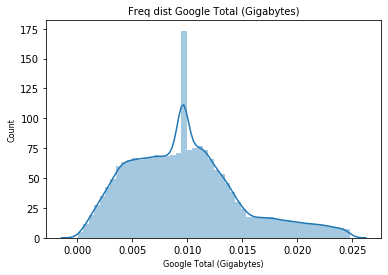

In [26]:
fig, ax = plt.subplots()
sns.distplot(user_dataset_apps['Google Total (Gigabytes)'], hist=True,)
ax.set_title('Freq dist '+'Google Total (Gigabytes)', fontsize=10)
ax.set_xlabel('Google Total (Gigabytes)', fontsize=8)
ax.set_ylabel('Count', fontsize=8)
plt.show()

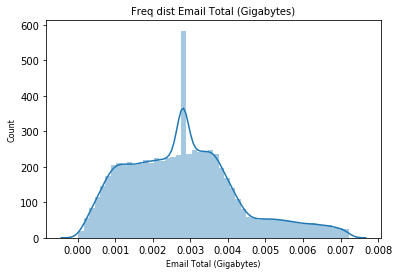

In [27]:
fig, ax = plt.subplots()
sns.distplot(user_dataset_apps['Email Total (Gigabytes)'], hist=True,)
ax.set_title('Freq dist '+'Email Total (Gigabytes)', fontsize=10)
ax.set_xlabel('Email Total (Gigabytes)', fontsize=8)
ax.set_ylabel('Count', fontsize=8)
plt.show()

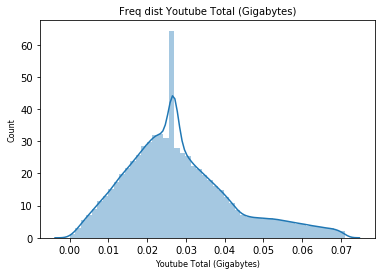

In [28]:
fig, ax = plt.subplots()
sns.distplot(user_dataset_apps['Youtube Total (Gigabytes)'], hist=True,)
ax.set_title('Freq dist '+'Youtube Total (Gigabytes)', fontsize=10)
ax.set_xlabel('Youtube Total (Gigabytes)', fontsize=8)
ax.set_ylabel('Count', fontsize=8)
plt.show()

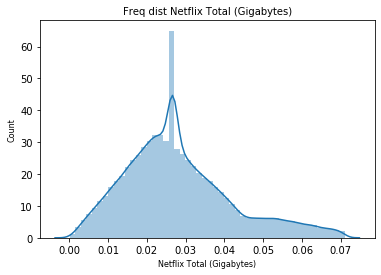

In [29]:
fig, ax = plt.subplots()
sns.distplot(user_dataset_apps['Netflix Total (Gigabytes)'], hist=True,)
ax.set_title('Freq dist '+'Netflix Total (Gigabytes)', fontsize=10)
ax.set_xlabel('Netflix Total (Gigabytes)', fontsize=8)
ax.set_ylabel('Count', fontsize=8)
plt.show()

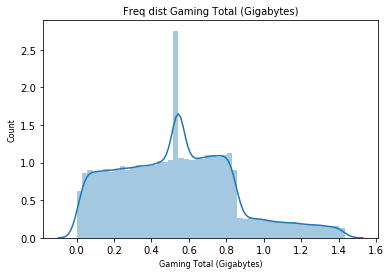

In [30]:
fig, ax = plt.subplots()
sns.distplot(user_dataset_apps['Gaming Total (Gigabytes)'], hist=True,)
ax.set_title('Freq dist '+'Gaming Total (Gigabytes)', fontsize=10)
ax.set_xlabel('Gaming Total (Gigabytes)', fontsize=8)
ax.set_ylabel('Count', fontsize=8)
plt.show()

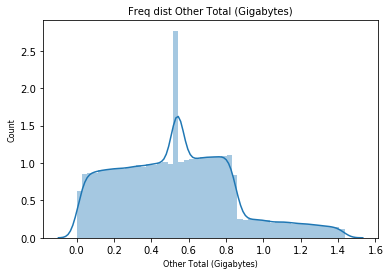

In [31]:
fig, ax = plt.subplots()
sns.distplot(user_dataset_apps['Other Total (Gigabytes)'], hist=True,)
ax.set_title('Freq dist '+'Other Total (Gigabytes)', fontsize=10)
ax.set_xlabel('Other Total (Gigabytes)', fontsize=8)
ax.set_ylabel('Count', fontsize=8)
plt.show()

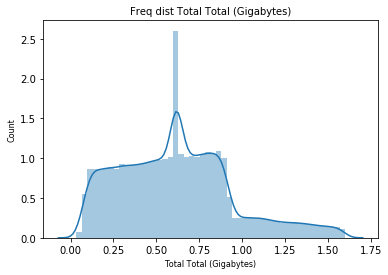

In [32]:
fig, ax = plt.subplots()
sns.distplot(user_dataset_apps['Total Total (Gigabytes)'], hist=True,)
ax.set_title('Freq dist '+'Total Total (Gigabytes)', fontsize=10)
ax.set_xlabel('Total Total (Gigabytes)', fontsize=8)
ax.set_ylabel('Count', fontsize=8)
plt.show()

##### Bivariate Analysis

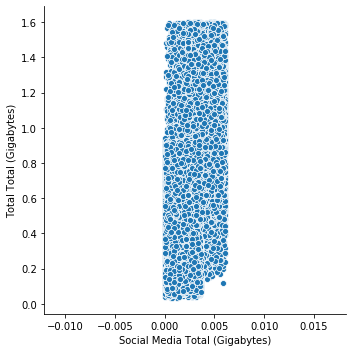

In [33]:
#Total data vs Social Media Total
socials = user_dataset_apps[['Social Media Total (Gigabytes)','Total Total (Gigabytes)']]
socials.cov()
sns.relplot(x='Social Media Total (Gigabytes)',y='Total Total (Gigabytes)',data = socials)

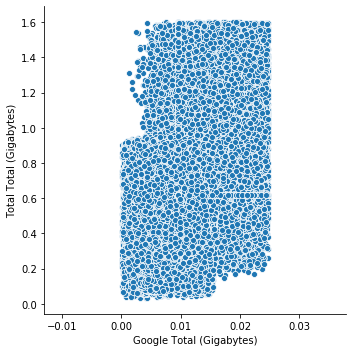

In [34]:
#Total data vs Google Total
google = user_dataset_apps[['Google Total (Gigabytes)','Total Total (Gigabytes)']]
google.cov()
sns.relplot(x='Google Total (Gigabytes)',y='Total Total (Gigabytes)',data = google)

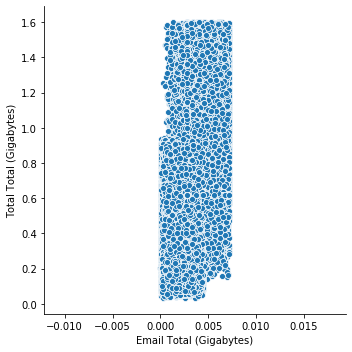

In [35]:
#Total data vs Email Total
mail = user_dataset_apps[['Email Total (Gigabytes)','Total Total (Gigabytes)']]
mail.cov()
sns.relplot(x='Email Total (Gigabytes)',y='Total Total (Gigabytes)',data = mail)

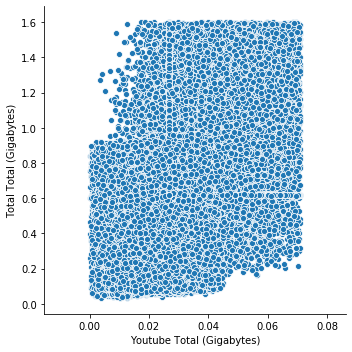

In [36]:
#Total data vs Youtube Total
tube = user_dataset_apps[['Youtube Total (Gigabytes)','Total Total (Gigabytes)']]
tube.cov()
sns.relplot(x='Youtube Total (Gigabytes)',y='Total Total (Gigabytes)',data = tube)

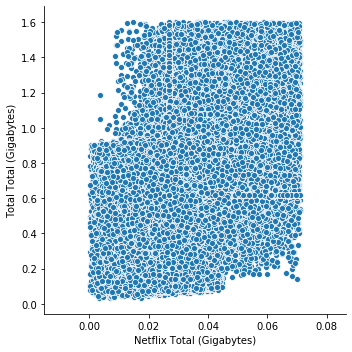

In [37]:
#Total data vs Netflix Total
flix = user_dataset_apps[['Netflix Total (Gigabytes)','Total Total (Gigabytes)']]
flix.cov()
sns.relplot(x='Netflix Total (Gigabytes)',y='Total Total (Gigabytes)',data = flix)

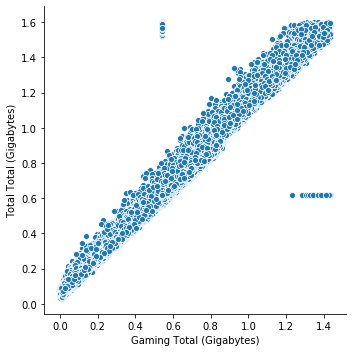

In [38]:
#Total data vs Gaming Total 
game = user_dataset_apps[['Gaming Total (Gigabytes)','Total Total (Gigabytes)']]
game.cov()
sns.relplot(x='Gaming Total (Gigabytes)',y='Total Total (Gigabytes)',data = game)

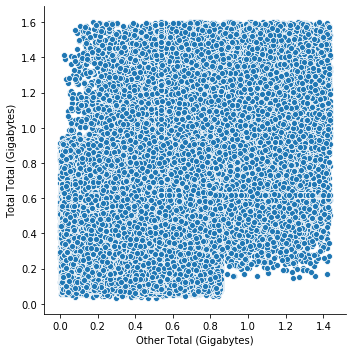

In [39]:
#Total data vs Other Total 
other = user_dataset_apps[['Other Total (Gigabytes)','Total Total (Gigabytes)']]
other.cov()
sns.relplot(x='Other Total (Gigabytes)',y='Total Total (Gigabytes)',data = other)


##### Variable transformations

##### Correlation Analysis

In [41]:
user_dataset_apps_corr = user_dataset_apps[[ 'Social Media Total (Gigabytes)', 'Google Total (Gigabytes)','Email Total (Gigabytes)', 'Youtube Total (Gigabytes)', 'Netflix Total (Gigabytes)','Gaming Total (Gigabytes)', 'Other Total (Gigabytes)']].sum()
user_dataset_apps_corr = pd.DataFrame(user_dataset_apps_corr)
user_dataset_apps_corr

,0
Social Media Total (Gigabytes),241.321133
Google Total (Gigabytes),1034.387171
Email Total (Gigabytes),298.933500
Youtube Total (Gigabytes),2998.886820
Netflix Total (Gigabytes),2996.671594
Gaming Total (Gigabytes),56777.814554
Other Total (Gigabytes),56626.121381


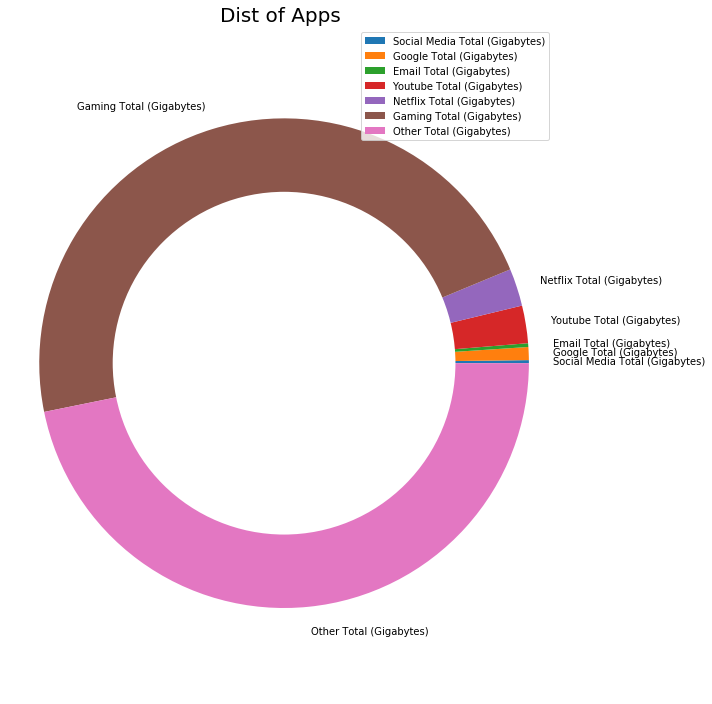

In [43]:
fig, ax = plt.subplots( figsize=(10, 10))
ax.pie(user_dataset_apps_corr[0], labels=user_dataset_apps_corr.index)
ax.axis('equal') 
ax.set_title('Dist of Apps', fontsize=20)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

##### Dimensionality Reduction

In [ ]:
dataset_apps_description = dataset_apps.describe(include='all')

#drop stats on MSISDN 
dataset_apps_description = dataset_apps_description.drop('MSISDN/Number', axis=1)

dataset_apps_mean = dataset_apps_description[dataset_apps_description.index == 'mean'].transpose()
dataset_apps_std = dataset_apps_description[dataset_apps_description.index == 'std'].transpose()
#Standard deviation is the square root of the variance
dataset_apps_var = (dataset_apps_description[dataset_apps_description.index == 'std'].transpose()) ** 2

dataset_apps_count = dataset_apps_description[dataset_apps_description.index == 'count'].transpose()
dataset_apps_min = dataset_apps_description[dataset_apps_description.index == 'min'].transpose()
dataset_apps_max = dataset_apps_description[dataset_apps_description.index == 'max'].transpose()

#percentiles
dataset_apps_25th = dataset_apps_description[dataset_apps_description.index == '25%'].transpose()
dataset_apps_50th = dataset_apps_description[dataset_apps_description.index == '50%'].transpose()
dataset_apps_75th = dataset_apps_description[dataset_apps_description.index == '75%'].transpose()